<a href="https://colab.research.google.com/github/Erickrus/llm/blob/main/deepseek_r1_training_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mermaid Ink
#https://github.com/jihchi/mermaid.ink

import base64
import io
import requests
import IPython
import re
from PIL import Image
from io import BytesIO

def mermaid(graph, format='svg', scale=0.5):

    format = format.lower().strip()
    if format == 'svg':
        mermaidInkUrl = 'https://mermaid.ink/svg/'
        svg_content = requests.get(
            mermaidInkUrl + base64.b64encode(graph.encode('ascii')).decode("ascii")
        ).content.decode('utf-8')
        svg_content = re.sub(r'(<svg[^>]*>)', r'\1<g transform="scale({})">'.format(scale), svg_content, 1)
        svg_content = svg_content.replace('</svg>', '</g></svg>')

        display(IPython.display.HTML(svg_content))
    else:
        mermaidInkUrl = 'https://mermaid.ink/img/'

        response = requests.get(
            mermaidInkUrl + base64.b64encode(graph.encode('ascii')).decode("ascii")
        )
        image = Image.open(BytesIO(response.content))
        display(image.resize((int(image.width * scale), int(image.height * scale)), Image.BICUBIC))


In [9]:
#@title Drawio Display
import os
import subprocess
from IPython.display import SVG, display

def display_drawio(drawio_filename):
    def system(cmd):
        result = subprocess.run(
            cmd, stdout = subprocess.PIPE, universal_newlines = True
        )
        return result.stdout

    svg_filename = drawio_filename + ".svg"
    if len(system(['whereis', 'drawio'])) < 10:
        print("Installing drawio desktop ...")
        os.system('wget -q https://github.com/jgraph/drawio-desktop/releases/download/v26.0.9/drawio-amd64-26.0.9.deb')
        os.system('dpkg -i drawio-amd64-26.0.9.deb')
        os.system('apt -y -f install')
        os.system('apt -q -y install xvfb')
        os.system('rm -f drawio-amd64-26.0.9.deb')
    cmd = f"xvfb-run drawio --no-sandbox -x -f svg -p 1 -o {svg_filename} {drawio_filename}"
    os.system(cmd)
    display(SVG(filename=svg_filename))
    os.remove(svg_filename)

In [10]:
#@title deepseek_training_process.drawio
%%writefile deepseek_training_process.drawio
<mxfile host="Electron" agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) draw.io/22.1.11 Chrome/114.0.5735.289 Electron/25.9.8 Safari/537.36" modified="2025-02-14T07:13:11.440Z" etag="CItA5X-dvihFgEU6kSIY" version="22.1.11" type="device">
  <diagram name="第 1 页" id="ocGdGZGF9_USJxnutTiA">
    <mxGraphModel dx="906" dy="470" grid="1" gridSize="10" guides="1" tooltips="1" connect="1" arrows="1" fold="1" page="1" pageScale="1" pageWidth="827" pageHeight="1169" math="0" shadow="0">
      <root>
        <mxCell id="0" />
        <mxCell id="1" parent="0" />
        <mxCell id="529OzB4sKJEJppcJG8wa-45" value="" style="rounded=1;whiteSpace=wrap;html=1;fillColor=none;arcSize=7;" parent="1" vertex="1">
          <mxGeometry x="300" y="919" width="180" height="320" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-14" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.73;exitY=1.005;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;exitPerimeter=0;" parent="1" source="529OzB4sKJEJppcJG8wa-8" target="529OzB4sKJEJppcJG8wa-13" edge="1">
          <mxGeometry relative="1" as="geometry">
            <Array as="points">
              <mxPoint x="281" y="470" />
            </Array>
          </mxGeometry>
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-8" value="" style="rounded=1;whiteSpace=wrap;html=1;fillColor=none;" parent="1" vertex="1">
          <mxGeometry x="40" y="340" width="330" height="110" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-10" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-1" edge="1">
          <mxGeometry relative="1" as="geometry">
            <mxPoint x="260" y="340" as="targetPoint" />
          </mxGeometry>
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-1" value="Supervised&lt;div&gt;Fine-Tuning&lt;/div&gt;&lt;div&gt;(SFT)&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="190" y="210" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-4" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-2" target="529OzB4sKJEJppcJG8wa-1" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-11" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0;exitY=0.5;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-2" target="529OzB4sKJEJppcJG8wa-6" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-2" value="&lt;b&gt;DeepSeek-V3 base&lt;/b&gt; 671B/37B Activated" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="190" y="100" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-5" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;exitPerimeter=0;entryX=1;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-3" target="529OzB4sKJEJppcJG8wa-1" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-3" value="Cold Start&amp;nbsp;&lt;div&gt;Long CoT Data&lt;/div&gt;&lt;div&gt;(~k samples)&lt;/div&gt;" style="shape=cylinder3;whiteSpace=wrap;html=1;boundedLbl=1;backgroundOutline=1;size=15;fillColor=#e7b8b0;" parent="1" vertex="1">
          <mxGeometry x="390" y="95" width="140" height="80" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-12" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-6" target="529OzB4sKJEJppcJG8wa-9" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-6" value="&lt;b&gt;Reasoning Oriented RL&lt;/b&gt;&lt;div&gt;GRPO Rule-based Reward (Accuracy, Formatting)&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="60" y="360" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-7" value="+CoT Language Consistent Reward" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="210" y="360" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-9" value="&lt;b&gt;DeepSeek-R1-Zero&lt;/b&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="60" y="1150" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-16" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-13" target="529OzB4sKJEJppcJG8wa-15" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-13" value="DeepSeek-V3 base&lt;div&gt;+CS SFT +RORL&lt;/div&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="210" y="490" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-15" value="&lt;b&gt;Reasoing Prompts&lt;/b&gt;&lt;div&gt;* Rejection Sampling (Rule-based &amp;amp; DS-V3 as judge)&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="210" y="590" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-17" value="&lt;b&gt;Reasoning&lt;/b&gt;&lt;div&gt;&lt;b&gt;Data&lt;/b&gt;&lt;div&gt;600k samples&lt;/div&gt;&lt;/div&gt;" style="shape=cylinder3;whiteSpace=wrap;html=1;boundedLbl=1;backgroundOutline=1;size=15;fillColor=#e7b8b0;" parent="1" vertex="1">
          <mxGeometry x="210" y="690" width="140" height="80" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-18" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;entryPerimeter=0;" parent="1" source="529OzB4sKJEJppcJG8wa-15" target="529OzB4sKJEJppcJG8wa-17" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-33" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;exitPerimeter=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-19" target="529OzB4sKJEJppcJG8wa-30" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-47" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0;exitY=0.5;exitDx=0;exitDy=0;exitPerimeter=0;entryX=1;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-19" target="529OzB4sKJEJppcJG8wa-40" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-19" value="Combined SFT Data (800k samples)" style="shape=cylinder3;whiteSpace=wrap;html=1;boundedLbl=1;backgroundOutline=1;size=15;fillColor=#e7b8b0;" parent="1" vertex="1">
          <mxGeometry x="560" y="820" width="140" height="80" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-20" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;exitPerimeter=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;entryPerimeter=0;" parent="1" source="529OzB4sKJEJppcJG8wa-17" target="529OzB4sKJEJppcJG8wa-19" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-23" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-21" target="529OzB4sKJEJppcJG8wa-22" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-21" value="DeepSeek-V3&lt;div&gt;671B/37B Activated&lt;/div&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="560" y="100" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-22" value="CoT Prompting" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="560" y="585" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-37" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;exitPerimeter=0;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-24" target="529OzB4sKJEJppcJG8wa-22" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-24" value="DeepSeek SFT Data" style="shape=cylinder3;whiteSpace=wrap;html=1;boundedLbl=1;backgroundOutline=1;size=15;fillColor=#e7b8b0;" parent="1" vertex="1">
          <mxGeometry x="390" y="480" width="140" height="80" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-25" value="&lt;b&gt;Non Reasoning&lt;/b&gt; &lt;b&gt;Data&lt;/b&gt; (200k samples)" style="shape=cylinder3;whiteSpace=wrap;html=1;boundedLbl=1;backgroundOutline=1;size=15;fillColor=#e7b8b0;" parent="1" vertex="1">
          <mxGeometry x="560" y="690" width="140" height="80" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-26" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;entryPerimeter=0;" parent="1" source="529OzB4sKJEJppcJG8wa-22" target="529OzB4sKJEJppcJG8wa-25" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-29" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;exitPerimeter=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;entryPerimeter=0;" parent="1" source="529OzB4sKJEJppcJG8wa-25" target="529OzB4sKJEJppcJG8wa-19" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-32" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-30" target="529OzB4sKJEJppcJG8wa-31" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-30" value="SFT&lt;div&gt;2 epochs&lt;/div&gt;&lt;div&gt;800k samples&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="560" y="950" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-35" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-31" target="529OzB4sKJEJppcJG8wa-34" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-31" value="RL Reasoning + Preference Reward Diverse Training Prompts" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="560" y="1050" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-34" value="&lt;b&gt;DeepSeek-R1&lt;/b&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="560" y="1150" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-43" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-38" target="529OzB4sKJEJppcJG8wa-40" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-38" value="&lt;b&gt;{Qwen/Llama}-{*B}&lt;/b&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="320" y="950" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-39" value="&lt;b&gt;DeepSeek-R1-Distill-{Qwen/Llama}-{*B}&lt;/b&gt;" style="rounded=0;whiteSpace=wrap;html=1;fillColor=#cee1ef;" parent="1" vertex="1">
          <mxGeometry x="320" y="1150" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-44" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.5;exitY=1;exitDx=0;exitDy=0;entryX=0.5;entryY=0;entryDx=0;entryDy=0;" parent="1" source="529OzB4sKJEJppcJG8wa-40" target="529OzB4sKJEJppcJG8wa-39" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-40" value="SFT&lt;div&gt;2 epochs&lt;/div&gt;&lt;div&gt;800k samples&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#ffffcc;" parent="1" vertex="1">
          <mxGeometry x="320" y="1050" width="140" height="70" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-48" value="&lt;b&gt;Distillation&lt;/b&gt;" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="360" y="919" width="60" height="30" as="geometry" />
        </mxCell>
        <mxCell id="529OzB4sKJEJppcJG8wa-49" value="&lt;font style=&quot;font-size: 36px;&quot;&gt;DeepSeek R1&amp;nbsp;&lt;/font&gt;&lt;span style=&quot;font-size: 36px; background-color: transparent; color: light-dark(rgb(0, 0, 0), rgb(255, 255, 255));&quot;&gt;Training Process&lt;/span&gt;" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="155" y="30" width="555" height="30" as="geometry" />
        </mxCell>
      </root>
    </mxGraphModel>
  </diagram>
</mxfile>

Overwriting deepseek_training_process.drawio


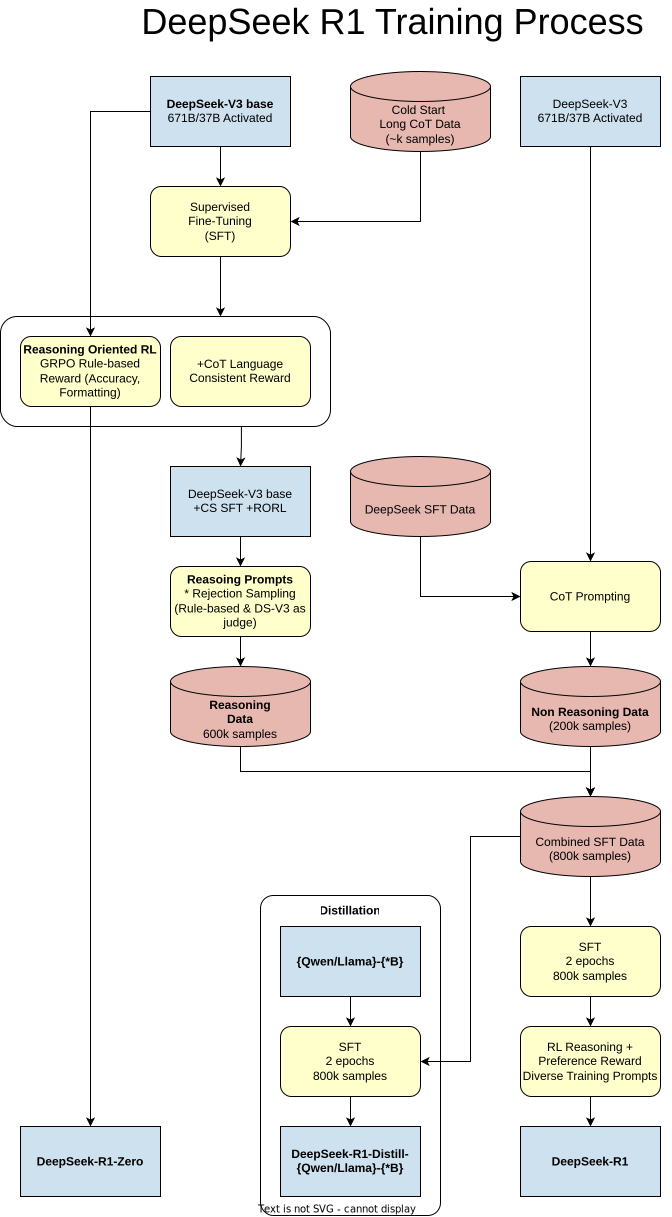

In [11]:
#@title DeepSeek R1 Training Process
display_drawio("/content/deepseek_training_process.drawio")